#### Goal - read puyallup data

In [2]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup
from sys import platform
import io
import datetime

if platform == "linux" or platform == "linux2":
    data_string = "/home/maria/Documents/data/pied_piper/puyallup/"
    output_string = "/home/maria/Documents/output/pied_piper/puyallup/"

elif platform == "win32"or platform == "win64":
    data_string = "C:/Users/maria/OneDrive/Documents/data/pied_piper/puyallup/"
    output_string = "C:/Users/maria/OneDrive/Documents/output/pied_piper/puyallup/"

In [38]:
# #read file in Windows
try:
    df = pd.read_excel(
   io=data_string + "puyallup_chinook_2004-2018.xlsx",
   sheet_name ='2004',
    header = [3]
)
except PermissionError:
    print("Permission Error. Close the file, if it is open.")
    

df.head()


,Date,Flow (cfs),Secchi depth (cm),Hours of day,# of fish caught (day),CPUE (Day),Hours of night,# of fish caught (night),CPUE (night),TOTAL CPUE,...,Flow (cfs).1,Secchi Disk Depth (cm),Hours of Daylight,# of Fish Caught,CPUE (Day).1,Hours of Night,# of Fish Caught.1,CPUE (Night),Total CPUE,Total Hours
0,2004-02-29,1050.0,150,8.5,0.0,0,13.75,0.0,0,0,...,1050.0,150.0,8.5,0,0,13.75,0.0,0,0,22.25
1,2004-03-01,982.0,150,10.75,0.0,0,15.25,2.0,0.131148,0.076923,...,982.0,150.0,10.75,0,0,15.25,0.0,0,0,26
2,2004-03-02,923.0,150,10.25,1.0,0.097561,13.75,0.0,0,0.041667,...,923.0,150.0,10.25,0,0,13.75,0.0,0,0,24
3,2004-03-03,955.0,150,10.25,0.0,0,14.25,0.0,0,0,...,955.0,150.0,10.25,0,0,14.25,0.0,0,0,24.5
4,2004-03-04,1300.0,150,9.25,0.0,0,15,0.0,0,0,...,1300.0,150.0,9.25,0,0,15,0.0,0,0,24.25


In [39]:
columns = list(df)
print(columns)

df.rename(columns = {
    'Flow (cfs)':'flow',
    'Secchi depth (cm)':'secchi_depth',
    'Hours of  day':'In_day',
    '# of fish caught (day)':'chinook0_wild_num_day',
    'CPUE (Day)':'chinook0_wild_perhour_day',
    '# of fish caught (night)': 'chinook0_wild_num_night',
    'CPUE (night)':'chinook0_wild_perhour_night',
    'TOTAL CPUE':'chinook0_wild_perhour',
    '# of Fish Caught':'chinook0_hatchery_num_day',
    'CPUE (Day).1':'chinook0_hatchery_perhour_day',
    'Hours of Night':'In_night',
    '# of Fish Caught.1':'chinook0_hatchery_num_night',
    'CPUE (Night)':'chinook0_hatchery_perhour_night',
    'Total CPUE':'chinook0_hatchery_perhour',
    'Total Hours':'In',
    'Estimated Capture Efficiency':'trap_efficiency'
    
}, inplace = True)

df.head()

['Date', 'Flow (cfs)', 'Secchi depth (cm)', 'Hours of  day', '# of fish caught (day)', 'CPUE (Day)', 'Hours of night', '# of fish caught (night)', 'CPUE (night)', 'TOTAL CPUE', 'TOTAL HOURS', 'Estimated Capture Efficiency', 'Daily Estimated Production', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Date.1', 'Flow (cfs).1', 'Secchi Disk Depth (cm)', 'Hours of  Daylight', '# of Fish Caught', 'CPUE (Day).1', 'Hours of Night', '# of Fish Caught.1', 'CPUE (Night)', 'Total CPUE', 'Total Hours']


,Date,flow,secchi_depth,In_day,chinook0_wild_num_day,chinook0_wild_perhour_day,Hours of night,chinook0_wild_num_night,chinook0_wild_perhour_night,chinook0_wild_perhour,...,Flow (cfs).1,Secchi Disk Depth (cm),Hours of Daylight,chinook0_hatchery_num_day,chinook0_hatchery_perhour_day,In_night,chinook0_hatchery_num_night,chinook0_hatchery_perhour_night,chinook0_hatchery_perhour,In
0,2004-02-29,1050.0,150,8.5,0.0,0,13.75,0.0,0,0,...,1050.0,150.0,8.5,0,0,13.75,0.0,0,0,22.25
1,2004-03-01,982.0,150,10.75,0.0,0,15.25,2.0,0.131148,0.076923,...,982.0,150.0,10.75,0,0,15.25,0.0,0,0,26
2,2004-03-02,923.0,150,10.25,1.0,0.097561,13.75,0.0,0,0.041667,...,923.0,150.0,10.25,0,0,13.75,0.0,0,0,24
3,2004-03-03,955.0,150,10.25,0.0,0,14.25,0.0,0,0,...,955.0,150.0,10.25,0,0,14.25,0.0,0,0,24.5
4,2004-03-04,1300.0,150,9.25,0.0,0,15,0.0,0,0,...,1300.0,150.0,9.25,0,0,15,0.0,0,0,24.25


In [40]:
df_subset = df[['Date', 'flow', 'secchi_depth','In_day','In_night','In',
                'chinook0_wild_num_day','chinook0_wild_perhour_day',
                'chinook0_wild_num_night','chinook0_wild_perhour_night',
                'chinook0_hatchery_num_day','chinook0_hatchery_perhour_day',
                'chinook0_hatchery_num_night','chinook0_hatchery_perhour_night',
                'chinook0_wild_perhour','chinook0_hatchery_perhour', 'trap_efficiency']]
df_subset.head()



,Date,flow,secchi_depth,In_day,In_night,In,chinook0_wild_num_day,chinook0_wild_perhour_day,chinook0_wild_num_night,chinook0_wild_perhour_night,chinook0_hatchery_num_day,chinook0_hatchery_perhour_day,chinook0_hatchery_num_night,chinook0_hatchery_perhour_night,chinook0_wild_perhour,chinook0_hatchery_perhour,trap_efficiency
0,2004-02-29,1050.0,150,8.5,13.75,22.25,0.0,0,0.0,0,0,0,0.0,0,0,0,0.0046
1,2004-03-01,982.0,150,10.75,15.25,26,0.0,0,2.0,0.131148,0,0,0.0,0,0.076923,0,0.0046
2,2004-03-02,923.0,150,10.25,13.75,24,1.0,0.097561,0.0,0,0,0,0.0,0,0.041667,0,0.0046
3,2004-03-03,955.0,150,10.25,14.25,24.5,0.0,0,0.0,0,0,0,0.0,0,0,0,0.0046
4,2004-03-04,1300.0,150,9.25,15,24.25,0.0,0,0.0,0,0,0,0.0,0,0,0,0.0046


In [41]:
df_subset.loc[(df_subset['In_day'] == '-'),:] =np.nan
df_subset.loc[(df_subset['In_night'] == '-'),:] =np.nan
df_subset.head()

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Date,flow,secchi_depth,In_day,In_night,In,chinook0_wild_num_day,chinook0_wild_perhour_day,chinook0_wild_num_night,chinook0_wild_perhour_night,chinook0_hatchery_num_day,chinook0_hatchery_perhour_day,chinook0_hatchery_num_night,chinook0_hatchery_perhour_night,chinook0_wild_perhour,chinook0_hatchery_perhour,trap_efficiency
0,2004-02-29,1050.0,150,8.5,13.75,22.25,0.0,0,0.0,0,0,0,0.0,0,0,0,0.0046
1,2004-03-01,982.0,150,10.75,15.25,26,0.0,0,2.0,0.131148,0,0,0.0,0,0.076923,0,0.0046
2,2004-03-02,923.0,150,10.25,13.75,24,1.0,0.097561,0.0,0,0,0,0.0,0,0.041667,0,0.0046
3,2004-03-03,955.0,150,10.25,14.25,24.5,0.0,0,0.0,0,0,0,0.0,0,0,0,0.0046
4,2004-03-04,1300.0,150,9.25,15,24.25,0.0,0,0.0,0,0,0,0.0,0,0,0,0.0046


In [45]:
df_subset['chinook0_wild_perhour_day_estimate'] = (df_subset['chinook0_wild_perhour_day']/
                                                   df_subset['trap_efficiency'])
df_subset['chinook0_wild_perhour_night_estimate'] = (df_subset['chinook0_wild_perhour_night']/
                                                   df_subset['trap_efficiency'])
df_subset['chinook0_wild_perhour_estimate'] = (df_subset['chinook0_wild_perhour']/
                                                   df_subset['trap_efficiency'])

df_subset['chinook0_hatchery_perhour_day_estimate'] = (df_subset['chinook0_hatchery_perhour_day']/
                                                   df_subset['trap_efficiency'])
df_subset['chinook0_hatchery_perhour_night_estimate'] = (df_subset['chinook0_hatchery_perhour_night']/
                                                   df_subset['trap_efficiency'])
df_subset['chinook0_hatchery_perhour_estimate'] = (df_subset['chinook0_hatchery_perhour']/
                                                   df_subset['trap_efficiency'])

print(df_subset[['chinook0_wild_perhour_estimate','chinook0_hatchery_perhour_estimate','trap_efficiency']])

    chinook0_wild_perhour_estimate chinook0_hatchery_perhour_estimate  \
0                              0.0                                0.0   
1                        16.722222                                0.0   
2                          9.05787                                0.0   
3                              0.0                                0.0   
4                              0.0                                0.0   
..                             ...                                ...   
161                            NaN                                NaN   
162                            NaN                                NaN   
163                            NaN                                NaN   
164                            NaN                                NaN   
165                            NaN                                NaN   

    trap_efficiency  
0            0.0046  
1            0.0046  
2            0.0046  
3            0.0046  
4            

C:\Users\maria\AppData\Local\Temp/ipykernel_18712/3378021337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['chinook0_wild_perhour_day_estimate'] = (df_subset['chinook0_wild_perhour_day']/
C:\Users\maria\AppData\Local\Temp/ipykernel_18712/3378021337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['chinook0_wild_perhour_night_estimate'] = (df_subset['chinook0_wild_perhour_night']/
C:\Users\maria\AppData\Local\Temp/ipykernel_18712/3378021337.py:5: SettingWithCopyWarning: 
A value 

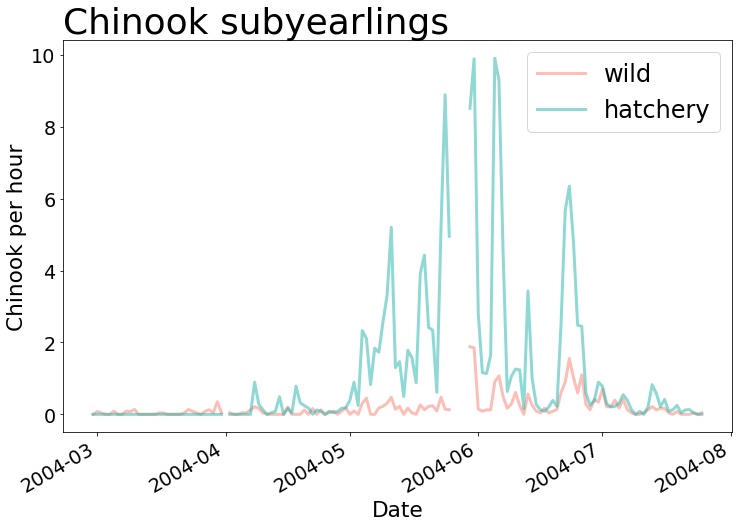

In [36]:
#plotting all of them

fs=24
lw = 3
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)


ax1.plot(
    df_subset['Date'], df_subset['chinook0_wild_perhour'], color = 'salmon', 
    label = 'wild', alpha = 0.5, linewidth = lw)


ax1.plot(df_subset['Date'], df_subset['chinook0_hatchery_perhour'], color = 'lightseagreen', 
         label = 'hatchery', alpha = 0.5, linewidth = lw)

plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Chinook per hour', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Chinook subyearlings', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()
